In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.9 MB/s eta 0:00:00


In [ ]:
# import libraries
import os
import torch
from torch.utils.data import Dataset
from PIL import Image
import pandas as pd
from torchvision.transforms import transforms
import torchvision
import numpy as np
import json
from torch.utils.data import Dataset
import cv2
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn import preprocessing
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import libraries
import os
import torch
from torch.utils.data import Dataset
from PIL import Image
import pandas as pd
from torchvision.transforms import transforms
import torchvision
import numpy as np
import json
from torch.utils.data import Dataset
import cv2
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn import preprocessing
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import torch
import torch.optim as optim
# import wandb
import torch.nn as nn
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch.nn.functional as F
from transformers import BertTokenizer, BertModel
from torch.nn.utils.rnn import pad_sequence
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_text = pd.read_json("/content/drive/MyDrive/A4/hateful_memes/train.jsonl",lines=True)
test_text = pd.read_json("/content/drive/MyDrive/A4/hateful_memes/dev_seen.jsonl",lines=True)
val_text = pd.read_json("/content/drive/MyDrive/A4/hateful_memes/test_seen.jsonl",lines=True)

In [ ]:
train_text

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."
...,...,...,...,...
8495,10423,img/10423.png,1,nobody wants to hang auschwitz me
8496,98203,img/98203.png,1,when god grants you a child after 20 years of ...
8497,36947,img/36947.png,1,gays on social media: equality! body positivit...
8498,16492,img/16492.png,1,having a bad day? you could be a siamese twin ...


In [ ]:
val_text

,id,img,label,text
0,16395,img/16395.png,1,handjobs sold seperately
1,37405,img/37405.png,1,introducing fidget spinner for women
2,94180,img/94180.png,1,happy pride month let's go beat up lesbians
3,54321,img/54321.png,1,laughs in [majority of u.s crime rate]
4,97015,img/97015.png,1,finds out those 72 virgins.. are goats
...,...,...,...,...
995,3869,img/03869.png,0,a mother's love for the child is a divine thing
996,23817,img/23817.png,0,sea monkeys
997,56280,img/56280.png,0,little miss muffet sat on her tuffet
998,29384,img/29384.png,0,they're in a row


In [ ]:
test_text

,id,img,label,text
0,8291,img/08291.png,1,white people is this a shooting range
1,46971,img/46971.png,1,bravery at its finest
2,3745,img/03745.png,1,your order comes to $37.50 and your white priv...
3,83745,img/83745.png,1,it is time.. to send these parasites back to t...
4,80243,img/80243.png,1,mississippi wind chime
...,...,...,...,...
495,83675,img/83675.png,0,i'm gonna be like phelps one day
496,37198,img/37198.png,0,when you're so relaxed you can feel yourself g...
497,48670,img/48670.png,0,look at this sandwich maker club i found on wi...
498,9863,img/09863.png,0,diverse group of women


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
# function to return text tokens
def preprocess_text(text):
    tokens = tokenizer.tokenize(text) # Tokenize the text
    token_ids = tokenizer.convert_tokens_to_ids(tokens) # Convert tokens to IDs
    return token_ids

In [ ]:
train_text['text'].apply(preprocess_text)[0]

[2049, 2037, 2839, 2025, 2037, 3609, 2008, 5609]

In [ ]:
train_text['text_tokens'] = train_text['text'].apply(preprocess_text)
val_text['text_tokens'] = val_text['text'].apply(preprocess_text)
test_text['text_tokens'] = test_text['text'].apply(preprocess_text)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
train_tokens_text = [torch.tensor(token) for token in train_text['text_tokens']]
train_tokens_text = pad_sequence(train_tokens_text, batch_first=True, padding_value=0)

In [ ]:
val_tokens_text = [torch.tensor(token) for token in val_text['text_tokens']]
val_tokens_text = pad_sequence(val_tokens_text, batch_first=True, padding_value=0)

In [ ]:
test_tokens_text = [torch.tensor(token) for token in test_text['text_tokens']]
test_tokens_text = pad_sequence(test_tokens_text, batch_first=True, padding_value=0)

In [ ]:
train_labels_text = torch.tensor([i for i in train_text['label']])
val_labels_text = torch.tensor([i for i in val_text['label']])
test_labels_text = torch.tensor([i for i in test_text['label']])

In [ ]:
# class to load image
class PNGDataset(Dataset):
    def __init__(self, root_dir, df,text ,transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.filenames = os.listdir(root_dir)
        self.df = df
        self.text = text

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):

        filename = self.filenames[idx]
        file_name = str(self.df['id'][idx])
        if len(file_name) == 4:
            file_name = '0'+file_name
        img_path = os.path.join(self.root_dir, file_name+'.png')
        #print(img_path)
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, self.text[idx], self.df['label'][idx]

In [ ]:
# apply necessary transformations like resize and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256,256)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
# split into train, test and val set
train_dataset_img = PNGDataset('/content/drive/MyDrive/img', train_text,train_tokens_text)
val_dataset_img= PNGDataset('/content/drive/MyDrive/img', val_text,val_tokens_text)
test_dataset_img= PNGDataset('/content/drive/MyDrive/img', test_text,test_tokens_text)

In [ ]:
train_dataset_img[22][1]

tensor([ 2074,  2138,  2027,  2079,  2023, 13004,  2078,  1005,  1056,  2812,
         2027,  1005,  2222,  2079,  2023,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0])

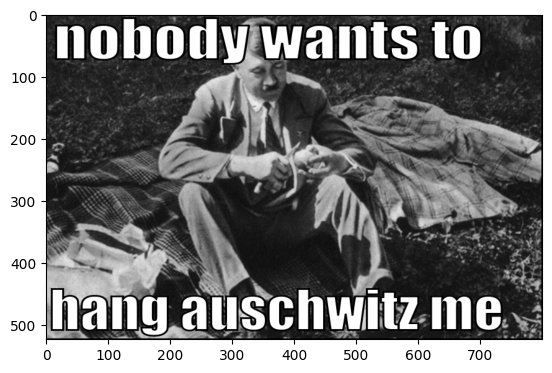

In [ ]:
plt.imshow(train_dataset_img[8495][0])

In [ ]:
# class that applies transformations to images
class ImageDataset(Dataset):
    def __init__(self, data,transform=None, target_transform=None):
        self.data=data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        
        image = self.data[idx][0]
        text = self.data[idx][1]
        
        # attention = self.data[idx][2]
        
        label = self.data[idx][2]
        if self.transform is not None:
            image = self.transform(image)
        return image,text ,label

In [ ]:
ImageDataset(train_dataset_img,transform=transform)[0][1]

tensor([2049, 2037, 2839, 2025, 2037, 3609, 2008, 5609,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0])

In [ ]:
batch_size = 128
# defining data loaders
train_loader_img = torch.utils.data.DataLoader(ImageDataset(train_dataset_img,transform=transform), batch_size, shuffle=True)
val_loader_img = torch.utils.data.DataLoader(ImageDataset(val_dataset_img,transform=transform), batch_size)
test_loader_img = torch.utils.data.DataLoader(ImageDataset(test_dataset_img,transform=transform), batch_size*2)

In [ ]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# data loader class
class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)


In [ ]:
import torch.nn as nn
from torchvision.models.resnet import resnet50
import json
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, classification_report
from transformers import AutoModel, AutoTokenizer, get_scheduler
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import AdamW
from tqdm.notebook import tqdm, trange
from time import perf_counter
from PIL import Image
import pandas as pd
device = 'cuda'

In [ ]:
class BertClassificationModel(torch.nn.Module):
    def __init__(self):
        super(BertClassificationModel, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = torch.nn.Dropout(0.5)
        self.linear = torch.nn.Linear(768, 2)
        
    # define forward method
    def forward(self, input_ids):
        output = self.bert(input_ids=input_ids)
        pooled_output = output.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.linear(pooled_output)
        return pooled_output
resnet18 = torchvision.models.resnet18(pretrained=True)
resnet18.fc = nn.Linear(in_features=512, out_features=2)
state_dict = torch.load("/content/drive/MyDrive/A4/Q1/model.pth",map_location=torch.device('cpu'))
resnet18.load_state_dict(state_dict)
for param in resnet18.parameters():
      param.requires_grad = False
resnet18.fc = nn.Linear(in_features=512, out_features=128)
bertModel = BertClassificationModel()
bertModel.load_state_dict(torch.load('/content/drive/MyDrive/A4/Q2/text_classifier.pt',map_location=torch.device('cpu')))
for param in bertModel.parameters():
        param.requires_grad = False
bertModel.linear =  torch.nn.Linear(768, 128)
class Merge(nn.Module):
  def __init__(self,text_model,img_model):
    super().__init__()
    self.text_model = text_model
    self.img_model = img_model
    self.linear1 = torch.nn.Linear(896, 64)
    self.linear2 = torch.nn.Linear(64, 2)
  
  def forward(self,text, img):
    a = self.text_model(text)
    b = self.img_model(img)
    c = torch.hstack((a,b))
    # print(c.shape)
    c = self.linear1(c)
    c = self.linear2(c)
    return c
    
merge_model = Merge(bertModel,resnet18)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 210MB/s]


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
criterion = nn.CrossEntropyLoss()

learning_rate = 5.0e-5
warmup_steps =200
t_total = len(train_loader_img) * 10
optimizer = torch.optim.Adam(merge_model.parameters(), lr=learning_rate, )
scheduler = get_scheduler(name="cosine", optimizer=optimizer, num_warmup_steps=warmup_steps, num_training_steps=t_total)


In [32]:
tloss=[]
vloss=[]
taccuracy=[]
vaccuracy=[]
prev_acc = 0
from tqdm.autonotebook import tqdm
criterion = nn.CrossEntropyLoss()
# define train loop
merge_model=merge_model.to('cuda')
for epoch in range(10):
    merge_model.train()
    train_loss,train_accuracy = 0,0
    for batch in tqdm(train_loader_img):
        b_imgs,b_inputs, b_labels  = batch    
        
        #inputs,text,attention, labels = batch
        # b_inputs = bert_tokenizer(
        #     list(b_text), truncation=True, max_length=32,
        #     return_tensors="pt", padding=True
        # )
        
        b_labels = b_labels.to(device)
        b_imgs = b_imgs.to(device)
        b_inputs = b_inputs.to(device)

        merge_model.zero_grad()        
        b_logits = merge_model(b_inputs, b_imgs)
        loss = criterion(b_logits, b_labels)
        loss.backward()
        optimizer.step()
        scheduler.step()
        pred_t = np.argmax(b_logits.detach().cpu().numpy(), axis=1)
        train_accuracy += accuracy_score(b_labels.detach().cpu().numpy(), pred_t)
        train_loss += loss.item()
      
        
        
        
    #scheduler.step()
    train_loss = train_loss / len(train_loader_img)
    train_accuracy = train_accuracy / len(train_loader_img)
    merge_model.eval()
    val_loss, val_accuracy = 0, 0
    with torch.no_grad():
        for batch in val_loader_img:
            b_imgs,b_inputs, b_labels  = batch   

            # b_inputs = bert_tokenizer(
            # list(b_text), truncation=True, max_length=32,
            # return_tensors="pt", padding=True)
        
            b_labels = b_labels.to(device)
            b_imgs = b_imgs.to(device)
            b_inputs = b_inputs.to(device)
            

            b_logits = merge_model(b_inputs,b_imgs)
            
            #loss_func = torch.nn.CrossEntropyLoss()
            loss = criterion(b_logits, b_labels)
            val_loss += loss.item()
            preds = np.argmax(b_logits.detach().cpu().numpy(), axis=1)
            val_accuracy += accuracy_score(b_labels.detach().cpu().numpy(), preds)
         
    
    val_loss = val_loss / len(val_loader_img)
    val_accuracy = val_accuracy / len(val_loader_img)
    if val_accuracy > prev_acc:
      prev_acc =val_accuracy
      torch.save(merge_model.state_dict(), '/content/drive/MyDrive/Colab Notebooks/data/model5555.pth')
    train_accuracy=train_accuracy*100
    val_accuracy=val_accuracy*100
    taccuracy.append(train_accuracy)
    vaccuracy.append(val_accuracy)
    tloss.append(train_loss)
    vloss.append(val_loss)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

  0%|          | 0/69 [00:00<?, ?it/s]

Epoch 1, Train Loss: 0.4803, Val Loss: 0.7305, Val Accuracy: 57.0237


  0%|          | 0/69 [00:00<?, ?it/s]

Epoch 2, Train Loss: 0.2493, Val Loss: 0.9387, Val Accuracy: 57.9252


  0%|          | 0/69 [00:00<?, ?it/s]

Epoch 3, Train Loss: 0.1056, Val Loss: 1.2306, Val Accuracy: 57.7524


  0%|          | 0/69 [00:00<?, ?it/s]

Epoch 4, Train Loss: 0.0593, Val Loss: 1.3831, Val Accuracy: 57.1139


  0%|          | 0/69 [00:00<?, ?it/s]

Epoch 5, Train Loss: 0.0503, Val Loss: 1.4889, Val Accuracy: 56.6031


  0%|          | 0/69 [00:00<?, ?it/s]

Epoch 6, Train Loss: 0.0514, Val Loss: 1.4617, Val Accuracy: 56.3101


  0%|          | 0/69 [00:00<?, ?it/s]

Epoch 7, Train Loss: 0.0483, Val Loss: 1.5123, Val Accuracy: 56.4303


  0%|          | 0/69 [00:00<?, ?it/s]

Epoch 8, Train Loss: 0.0479, Val Loss: 1.5024, Val Accuracy: 56.7984


  0%|          | 0/69 [00:00<?, ?it/s]

Epoch 9, Train Loss: 0.0468, Val Loss: 1.4898, Val Accuracy: 56.6256


  0%|          | 0/69 [00:00<?, ?it/s]

Epoch 10, Train Loss: 0.0495, Val Loss: 1.4523, Val Accuracy: 57.0162


In [33]:
# model.load_state_dict(torch.load("/content/model1.pth"))
# model.eval()

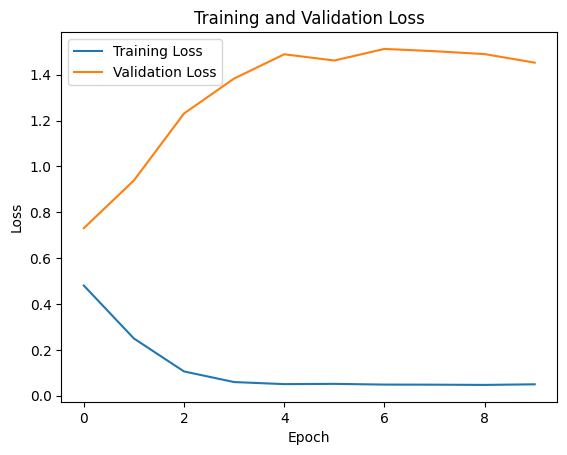

In [34]:
# Plot the training and validation loss
plt.plot(tloss, label='Training Loss')
plt.plot(vloss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

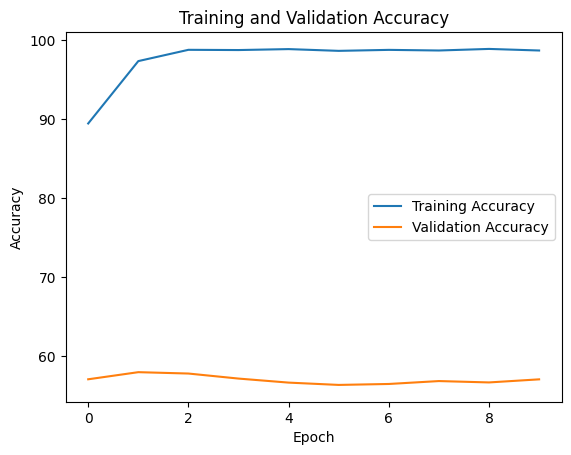

In [35]:
# Plot the training and validation loss
plt.plot(taccuracy, label='Training Accuracy')
plt.plot(vaccuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [38]:
merge_model.load_state_dict(torch.load("/content/drive/MyDrive/Colab Notebooks/data/model5555.pth"))
merge_model.eval()

Merge(
  (text_model): BertClassificationModel(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-11): 12 x BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_features=768, bias=True

In [40]:
# measure test accurancy
correct = 0
total = 0
with torch.no_grad():
    for batch in test_loader_img:
        
        b_imgs,b_inputs, b_labels  = batch    
        
        
        b_labels = b_labels.to(device)
        b_imgs = b_imgs.to(device)
        b_inputs = b_inputs.to(device)

        outputs = merge_model(b_inputs, b_imgs)
        _, predicted = torch.max(outputs.data, 1)
        total += b_labels.size(0)
        correct += (predicted == b_labels).sum().item()

print(f'Test Accuracy :- {100 * correct / total} %')

Test Accuracy :- 55.6 %


In [41]:
# Initialize lists to store labels and predictions
targets = []
predictions = []

# Iterate over test set and make predictions
with torch.no_grad():
    for batch in test_loader_img:
        b_imgs,b_inputs, b_labels  = batch    
        
        
        b_labels = b_labels.to(device)
        b_imgs = b_imgs.to(device)
        b_inputs = b_inputs.to(device)

        outputs = merge_model(b_inputs, b_imgs)
        
        _, preds = torch.max(outputs, 1)
        targets += b_labels.tolist()
        predictions += preds.tolist()

# Calculate overall precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(targets, predictions, average='macro')

print(f'Overall Precision: {precision:.4f}')
print(f'Overall Recall: {recall:.4f}')
print(f'Overall F1 Score: {f1_score:.4f}')

# Calculate class-wise precision, recall, and F1 score
precision, recall, f1_score, support = precision_recall_fscore_support(targets, predictions)

for i in range(2):
    print(f'Class {i} - Precision: {precision[i]:.4f}, Recall: {recall[i]:.4f}, F1 Score: {f1_score[i]:.4f}')

Overall Precision: 0.5729
Overall Recall: 0.5529
Overall F1 Score: 0.5216
Class 0 - Precision: 0.5407, Recall: 0.8142, F1 Score: 0.6498
Class 1 - Precision: 0.6050, Recall: 0.2915, F1 Score: 0.3934


In [46]:
merge_model=merge_model.to('cpu')

torch.Size([100, 64])
tensor(1)
100 100 100


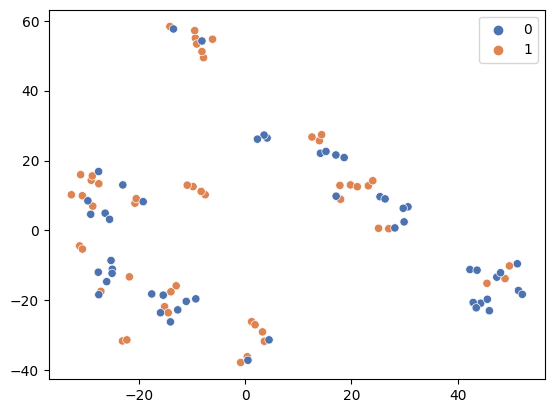

In [47]:
import pickle
with open('parrot.pkl', 'rb') as f:
  compare_labels = pickle.load(f)
compare_labels['text_tokens'] = compare_labels['text'].apply(preprocess_text)
compare_labels_tokens = [torch.tensor(token) for token in compare_labels['text_tokens']]
compare_labels_tokens = pad_sequence(compare_labels_tokens, batch_first=True, padding_value=0)
compare_labels_labels = torch.tensor([i for i in compare_labels['label']])
compare_labels_dataset_img= PNGDataset('/content/drive/MyDrive/img', compare_labels,compare_labels_tokens)
compare_labels_loader_img = torch.utils.data.DataLoader(ImageDataset(compare_labels_dataset_img,transform=transform), 100)
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.manifold import TSNE

def vector(img,text,model):
  l1  = model.text_model(text)  
  l2  = model.img_model(img)
  c = torch.hstack((l1,l2))
    # print(c.shape)
  c = model.linear1(c)
  return c

for batch in compare_labels_loader_img:
  b_imgs,b_inputs, b_labels  = batch
  t = vector(b_imgs,b_inputs,merge_model)
  print (t.shape)
  X_embedded = TSNE(n_components=2, learning_rate='auto',init='pca', perplexity=3).fit_transform(t.detach().numpy())
  x1= []
  y1 = []
  for i in X_embedded:
    x1.append(i[0])
    y1.append(i[1])
  print(b_labels[0])
  print(len(b_labels),len(x1),len(y1))
  sns.scatterplot(x=x1,y=y1,hue=b_labels,palette="deep")     
  cmap = ListedColormap(sns.color_palette("deep", 256).as_hex())

  break